# (1) DATA LOAD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/test.csv')

In [ ]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [ ]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


# (2) EDA

기초 통계량 파악: 최소값, 최대값, 평균, 중앙값, 표준편차

In [51]:
train_df.describe()

,port_src,port_dst,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,rate_bwd_pkts,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
count,8625.000000,9712.000000,10925.000000,11999.000000,11999.000000,1.082800e+04,1.031200e+04,1.199900e+04,1.199900e+04,10214.000000,10214.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,9.239000e+03
mean,42746.903420,6445.632619,16.712027,16.019168,20.222685,6.645382e+03,6.627536e+03,3.205688e+05,1.887607e+05,183.602231,183.602231,8464.435870,8691.062839,0.713976,2.409451,0.324027,3.409358e+08
std,20898.422967,16426.098766,120.178667,1125.156847,1559.513622,4.940035e+04,5.203941e+04,6.399730e+06,1.183179e+06,312.584458,312.584458,15043.771463,14180.141107,1.010957,13.620653,0.468030,6.284508e+08
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,35892.000000,58.000000,0.000037,1.000000,1.000000,0.000000e+00,1.455567e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.738550e-03
50%,51267.000000,83.000000,0.023343,2.000000,2.000000,7.683389e+00,1.477242e+01,2.479247e+01,4.142001e+02,61.500000,61.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.816914e-02
75%,58154.000000,447.000000,0.363972,6.000000,5.000000,8.485899e+01,5.011536e+02,2.209445e+03,8.446480e+03,141.000000,141.000000,8192.000000,26847.000000,2.000000,2.000000,1.000000,1.954012e+01
max,65535.000000,65384.000000,8567.023224,123229.000000,170796.000000,1.048576e+06,2.097152e+06,5.094846e+08,5.329233e+07,2433.333333,2433.333333,65535.000000,65535.000000,9.000000,1046.000000,1.000000,1.499458e+09


In [52]:
test_df.describe()

,port_src,port_dst,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,rate_bwd_pkts,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
count,2175.000000,2438.000000,2725.000000,3000.000000,3000.000000,2672.000000,2588.000000,3.000000e+03,3.000000e+03,2536.000000,2536.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2.311000e+03
mean,43031.708966,6470.760049,14.852351,7.825333,7.421333,4297.160920,4562.855130,1.697639e+05,1.931747e+05,183.667359,183.667359,8842.425667,9646.646000,0.748000,2.340667,0.329667,3.366967e+08
std,20671.898431,16348.688925,50.233286,142.737998,131.952589,26621.769336,20319.566313,1.710752e+06,1.149665e+06,312.035999,312.035999,15024.808644,14957.797757,1.009043,9.342646,0.470170,6.257750e+08
min,11.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,36328.500000,59.000000,0.000043,1.000000,1.000000,0.000000,0.083054,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.910310e-03
50%,51314.000000,83.000000,0.023797,2.000000,2.000000,6.889741,13.802767,2.197871e+01,2.736395e+02,62.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.706099e-02
75%,57991.000000,446.000000,0.525942,6.000000,5.000000,84.954167,201.432555,2.131585e+03,7.673355e+03,140.000000,140.000000,8192.000000,28960.000000,2.000000,2.000000,1.000000,7.147012e+00
max,65504.000000,65514.000000,703.044150,7799.000000,7197.000000,699050.666667,524288.000000,4.334114e+07,3.531019e+07,2263.000000,2263.000000,65535.000000,65535.000000,7.000000,376.000000,1.000000,1.499457e+09


결측치 및 변수 타입 확인

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


결측치 시각화: bar plot

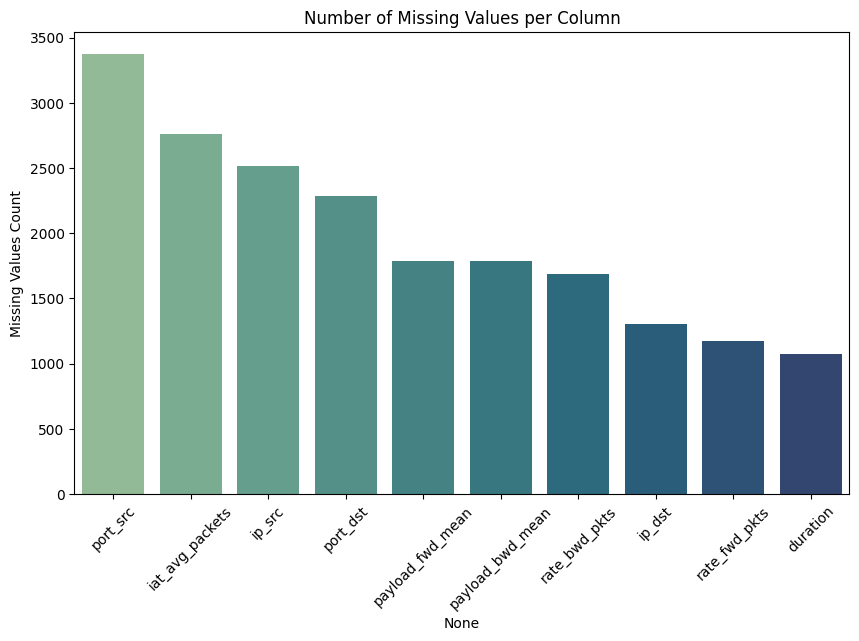

In [54]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.index, y=missing.values, palette="crest")
plt.xticks(rotation=45)
plt.ylabel('Missing Values Count')
plt.title('Number of Missing Values per Column')
plt.show()

이상치 시각화: z-score 시각화

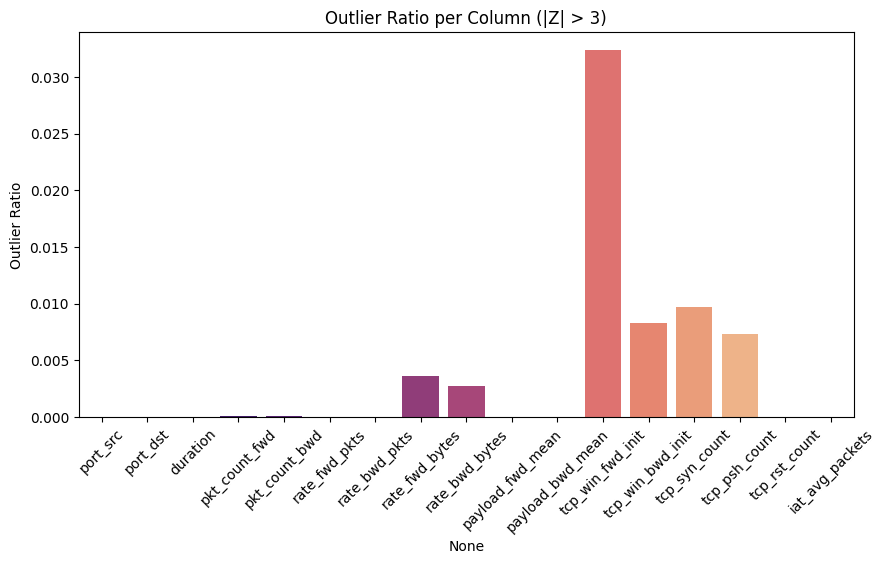

In [57]:
from scipy.stats import zscore

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

z_scores = train_df[numeric_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3)

outlier_ratio = outliers.sum() / len(train_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=outlier_ratio.index, y=outlier_ratio.values, palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Outlier Ratio')
plt.title('Outlier Ratio per Column (|Z| > 3)')
plt.show()

Feature 별 분포 확인
- 수치형 변수: histplot
- 범주형 변수: barplot

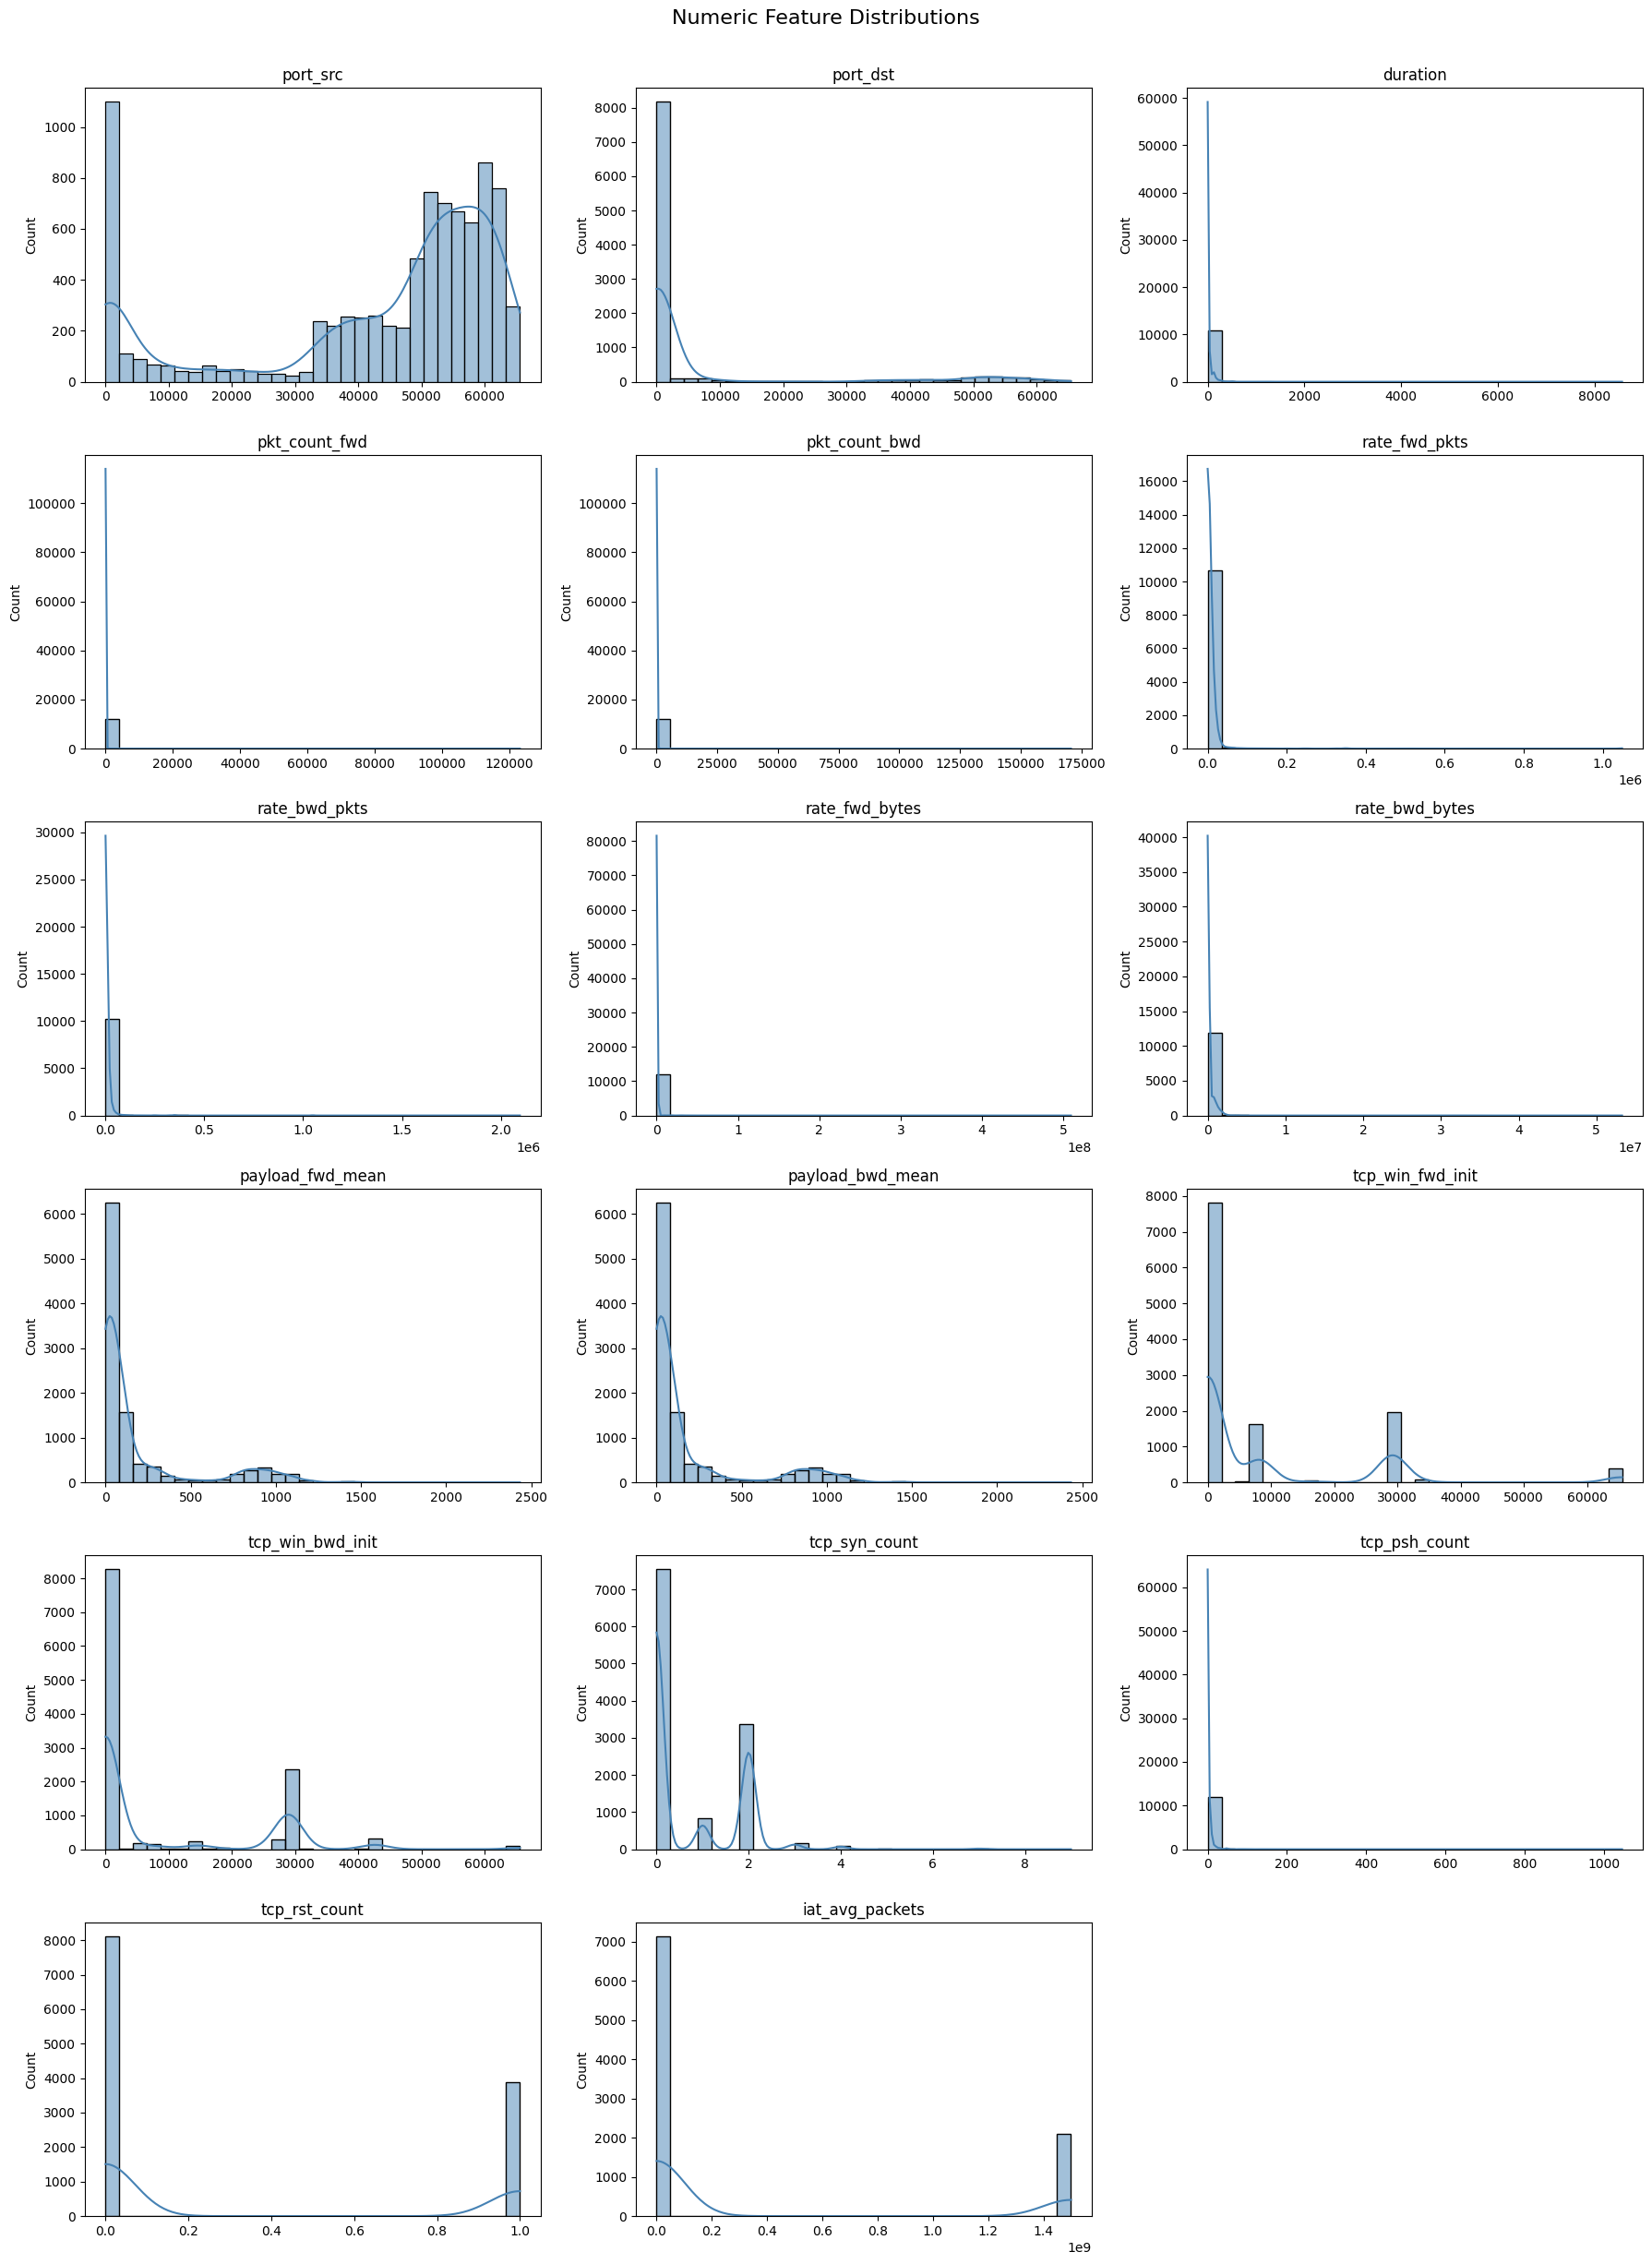

In [11]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[col], kde=True, bins=30, color='steelblue')
    plt.title(col)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Numeric Feature Distributions", fontsize=16, y=1.02)
plt.show()

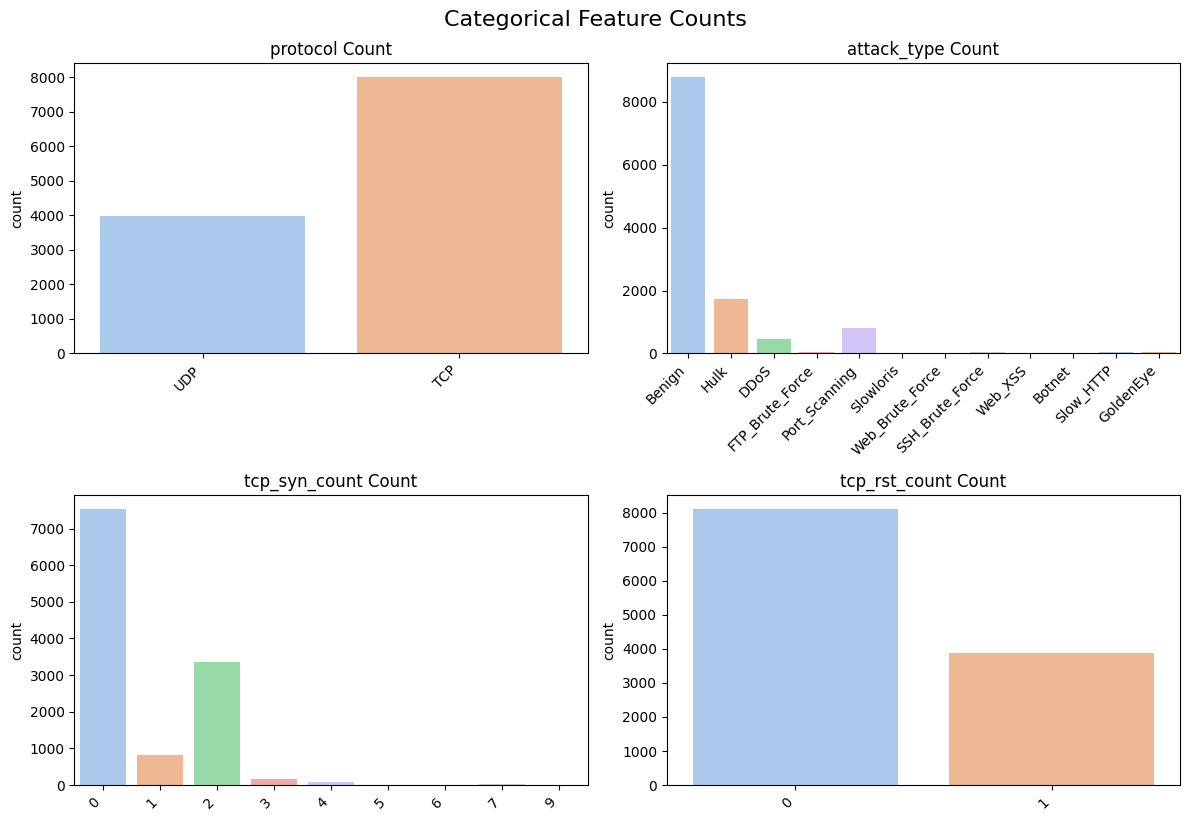

In [10]:
cat_cols = ['protocol', 'attack_type', 'tcp_syn_count', 'tcp_rst_count']

n_cols = 2
n_rows = -(-len(cat_cols) // n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=train_df, x=col, palette='pastel')
    plt.title(f'{col} Count')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Categorical Feature Counts", fontsize=16, y=1.02)
plt.show()

변수 간 상관관계 확인: 수치형 변수

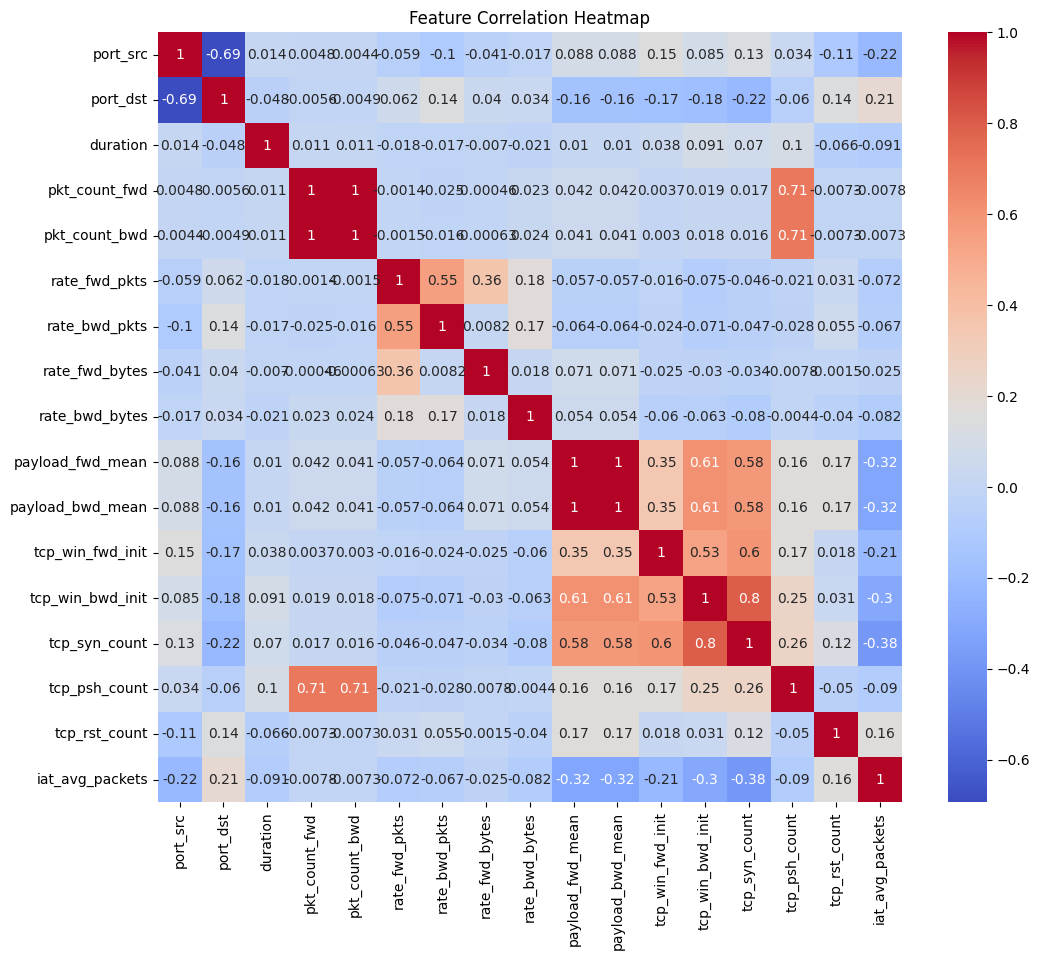

In [7]:
numeric_df = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

타겟 변수와의 시각화

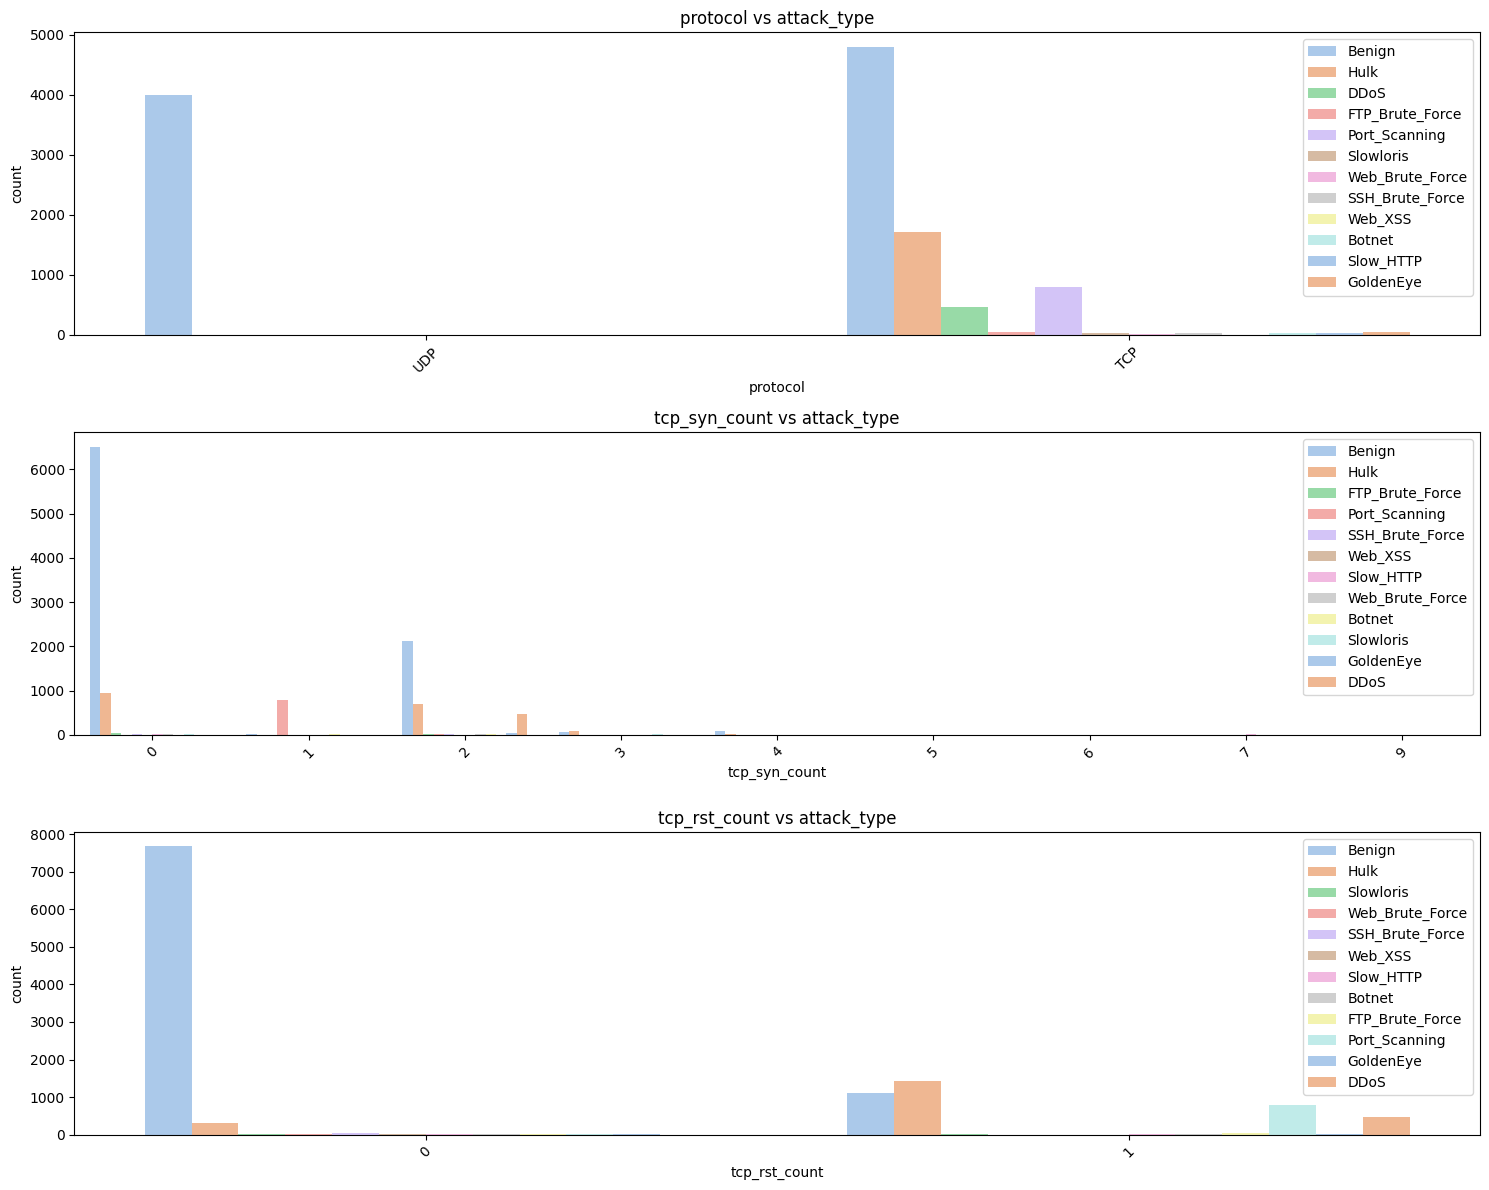

In [13]:
target = 'attack_type'

cat_features = ['protocol', 'tcp_syn_count', 'tcp_rst_count']

plt.figure(figsize=(15, 4 * len(cat_features)))
for i, col in enumerate(cat_features, 1):
    plt.subplot(len(cat_features), 1, i)
    sns.countplot(data=train_df, x=col, hue=target, palette='pastel')
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

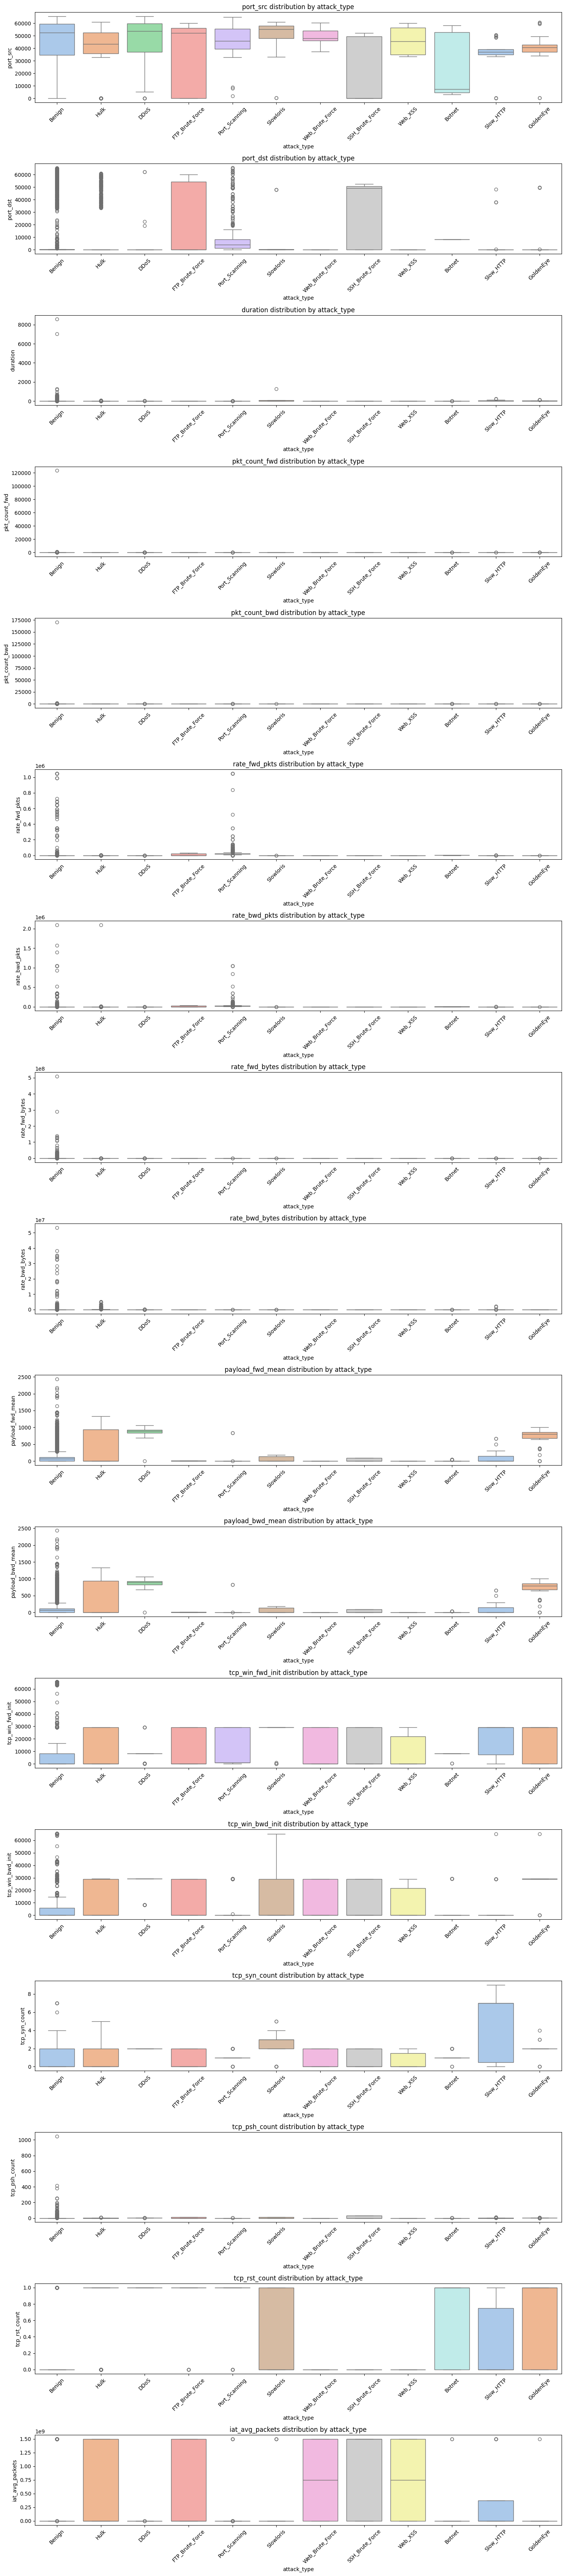

In [14]:
num_features = train_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 4 * len(num_features)))
for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.boxplot(data=train_df, x=target, y=col, palette='pastel')
    plt.title(f'{col} distribution by {target}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (3-1) 전처리

In [16]:
train = train_df.copy()
test = test_df.copy()

## payload 결측치 관련 파생변수

In [17]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [18]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['ip_src'].fillna(-1, inplace=True)
train['ip_dst'].fillna(-1, inplace=True)

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [19]:
test['ip_src'].fillna(-1, inplace=True)
test['ip_dst'].fillna(-1, inplace=True)

test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화

In [20]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [21]:
# port_src>1023 데이터 중 상위 5개 포트 추출
src_port_high = train[train['port_src'] > 1023]['port_src']
top5_ports = src_port_high.value_counts().nlargest(5).index

def categorize_port_src(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_src_cat'] = train['port_src'].apply(categorize_port_src)

src_port_high_test = test[test['port_src'] > 1023]['port_src']
top5_ports_test = src_port_high_test.value_counts().nlargest(5).index

def categorize_port_src_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_src_cat'] = test['port_src'].apply(categorize_port_src_test)

In [22]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

# (3-2) 추가 전처리 - 성능을 높이는 전략

## TCP 관련 추가 파생변수

송수신 TCP 윈도우 초기값의 비율

In [23]:
train['tcp_win_ratio'] = train['tcp_win_fwd_init'] / (train['tcp_win_bwd_init'] + 1e-5) # 0으로 나누는 것 방지
test['tcp_win_ratio'] = test['tcp_win_fwd_init'] / (test['tcp_win_bwd_init'] + 1e-5)

송수신 port 클러스터링 파생변수

-> 최적 군집 개수 = 2

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow(X, k_range=range(1, 11)):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  # inertia_: SSE

    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), sse, marker='o')
    plt.title('Elbow Method - Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid(True)
    plt.show()

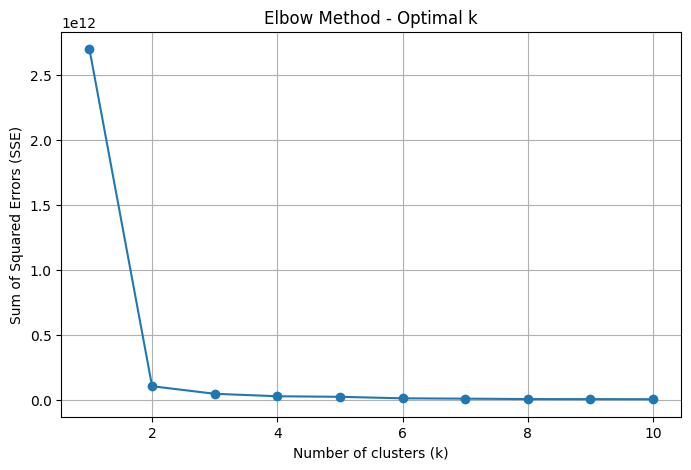

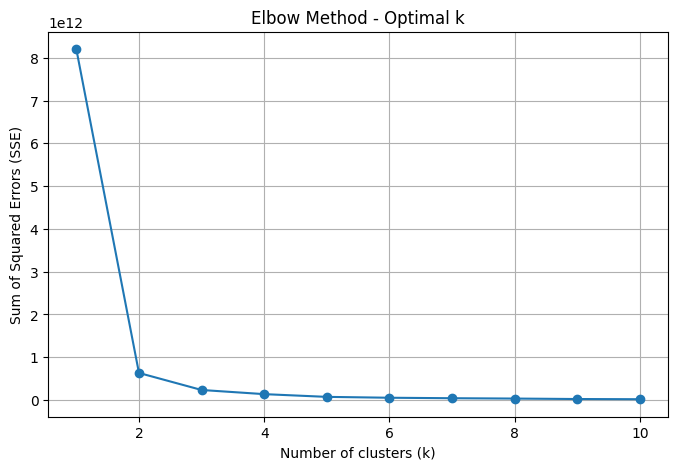

In [25]:
plot_elbow(train['port_dst'].values.reshape(-1,1))
plot_elbow(train['port_src'].values.reshape(-1,1))

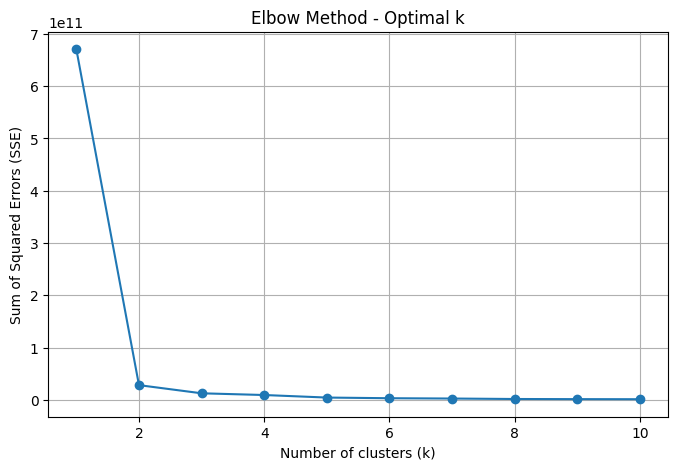

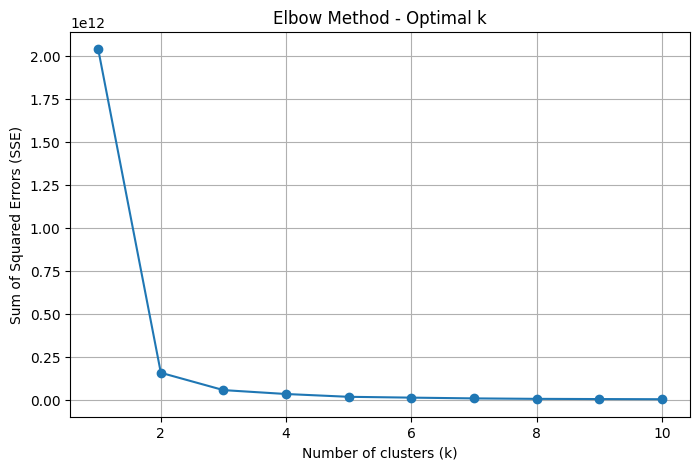

In [26]:
plot_elbow(test['port_dst'].values.reshape(-1,1))
plot_elbow(test['port_src'].values.reshape(-1,1))

In [27]:
from sklearn.cluster import KMeans

port_dst_train = train_df[['port_dst']].fillna(-1)
port_dst_test = test_df[['port_dst']].fillna(-1)

kmeans = KMeans(n_clusters=2, random_state=156)
train['port_dst_cluster'] = kmeans.fit_predict(port_dst_train)
test['port_dst_cluster'] = kmeans.predict(port_dst_test)

In [28]:
from sklearn.cluster import KMeans

port_src_train = train_df[['port_src']].fillna(-1)
port_src_test = test_df[['port_src']].fillna(-1)

kmeans = KMeans(n_clusters=2, random_state=156)
train['port_src_cluster'] = kmeans.fit_predict(port_src_train)
test['port_src_cluster'] = kmeans.predict(port_src_test)

IP별 송수신 통합 빈도

In [29]:
all_ips = pd.concat([train['ip_src'], train['ip_dst']])
ip_total_freq = all_ips.value_counts()

train['ip_src_total_freq'] = train['ip_src'].map(ip_total_freq)
train['ip_dst_total_freq'] = train['ip_dst'].map(ip_total_freq)

test['ip_src_total_freq'] = test['ip_src'].map(ip_total_freq).fillna(0)
test['ip_dst_total_freq'] = test['ip_dst'].map(ip_total_freq).fillna(0)

송수신 방향 전송량 및 duration 대비 전송량 (속도 개념)

In [30]:
# 송신 전송량
bytes_fwd = train['pkt_count_fwd'] * train['payload_fwd_mean']
# 수신 전송량
bytes_bwd = train['pkt_count_bwd'] * train['payload_bwd_mean']

train['bytes_fwd'] = bytes_fwd
train['bytes_bwd'] = bytes_bwd

# 전체 전송량
total_bytes = bytes_fwd + bytes_bwd

train['total_bytes'] = total_bytes

# duration 대비 전송량 (초당 전송 바이트)
train['bytes_per_sec'] = total_bytes / (train['duration'] + 1e-5)  # ZeroDivision 방지

In [31]:
# 송신 전송량
bytes_fwd_test = test['pkt_count_fwd'] * test['payload_fwd_mean']
# 수신 전송량
bytes_bwd_test = test['pkt_count_bwd'] * test['payload_bwd_mean']

test['bytes_fwd'] = bytes_fwd_test
test['bytes_bwd'] = bytes_bwd_test

# 전체 전송량
total_bytes_test = bytes_fwd + bytes_bwd

test['total_bytes'] = total_bytes_test

# duration 대비 전송량 (초당 전송 바이트)
test['bytes_per_sec'] = total_bytes_test / (test['duration'] + 1e-5)  # ZeroDivision 방지

duration 대비 패킷 수 (패킷 밀도)

In [32]:
# 전체 패킷 수
total_packets = train['pkt_count_fwd'] + train['pkt_count_bwd']
# 초당 패킷 수 (패킷 밀도)
train['packets_per_sec'] = total_packets / (train['duration'] + 1e-5)

# 전체 패킷 수
total_packets_test = test['pkt_count_fwd'] + test['pkt_count_bwd']
# 초당 패킷 수 (패킷 밀도)
test['packets_per_sec'] = total_packets_test / (test['duration'] + 1e-5)

In [33]:
# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

TCP flag

In [34]:
train['tcp_flag_sum'] = train['tcp_syn_count'] + train['tcp_psh_count'] + train['tcp_rst_count']
train['tcp_flag_ratio_syn'] = train['tcp_syn_count'] / (train['tcp_flag_sum'] + 1e-5)
train['tcp_flag_ratio_psh'] = train['tcp_psh_count'] / (train['tcp_flag_sum'] + 1e-5)
train['tcp_flag_ratio_rst'] = train['tcp_rst_count'] / (train['tcp_flag_sum'] + 1e-5)

test['tcp_flag_sum'] = test['tcp_syn_count'] + test['tcp_psh_count'] + test['tcp_rst_count']
test['tcp_flag_ratio_syn'] = test['tcp_syn_count'] / (test['tcp_flag_sum'] + 1e-5)
test['tcp_flag_ratio_psh'] = test['tcp_psh_count'] / (test['tcp_flag_sum'] + 1e-5)
test['tcp_flag_ratio_rst'] = test['tcp_rst_count'] / (test['tcp_flag_sum'] + 1e-5)

In [35]:
train['tcp_flag_density'] = train['tcp_flag_sum'] / (train['duration'] + 1e-5)
test['tcp_flag_density'] = test['tcp_flag_sum'] / (test['duration'] + 1e-5)

TCP flag diversity

In [36]:
train['tcp_flag_diversity'] = (train[['tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count']] > 0).sum(axis=1)
test['tcp_flag_diversity'] = (test[['tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count']] > 0).sum(axis=1)

TCP flag entropy (비율의 불균형성 측정)

In [37]:
import numpy as np

def tcp_flag_entropy(row):
    flags = np.array([row['tcp_flag_ratio_syn'], row['tcp_flag_ratio_psh'], row['tcp_flag_ratio_rst']])
    flags = flags[flags > 0]
    return -np.sum(flags * np.log2(flags))

train['tcp_flag_entropy'] = train.apply(tcp_flag_entropy, axis=1)
test['tcp_flag_entropy'] = test.apply(tcp_flag_entropy, axis=1)

가장 많이 나타난 TCP flag의 이름

In [38]:
def tcp_flag_dominant(row):
    flags = {
        'syn': row['tcp_syn_count'],
        'psh': row['tcp_psh_count'],
        'rst': row['tcp_rst_count']
    }
    return max(flags, key=flags.get)

train['tcp_flag_dominant'] = train.apply(tcp_flag_dominant, axis=1)
test['tcp_flag_dominant'] = test.apply(tcp_flag_dominant, axis=1)

TCP flag Dominace 비율

In [39]:
train['tcp_flag_dominance_ratio'] = train[['tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count']].max(axis=1) / (train['tcp_flag_sum'] + 1e-5)
test['tcp_flag_dominance_ratio'] = test[['tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count']].max(axis=1) / (test['tcp_flag_sum'] + 1e-5)

payload 평균 비율 파생변수

In [40]:
train['payload_ratio'] = train['payload_fwd_mean'] / (train['payload_bwd_mean'] + 1e-5)

test['payload_ratio'] = test['payload_fwd_mean'] / (test['payload_bwd_mean'] + 1e-5)

추가 파생변수 (현경)

In [41]:
from scipy.stats.mstats import winsorize

# a) iat_avg_packets: 윈저라이징(상·하위 1%)
train['iat_avg_packets_clipped'] = winsorize(train['iat_avg_packets'], limits=(0.01, 0.01))
test['iat_avg_packets_clipped'] = winsorize(test['iat_avg_packets'], limits=(0.01, 0.01))

# duration: 이미 'duration'에 대해 윈저라이징/스케일링이 필요시
# 윈저라이징 (상·하위 1%)
train['duration_clipped'] = winsorize(train['duration'], limits=(0.01, 0.01))
test['duration_clipped'] = winsorize(test['duration'], limits=(0.01, 0.01))


epsilon = 1e-6  # 분모가 0일 때 안정성 확보

# interaction term (duration × pkt_count_fwd)
train['duration_pkt_fwd_interaction'] = train['duration'] * train['pkt_count_fwd']
test['duration_pkt_fwd_interaction'] = test['duration'] * test['pkt_count_fwd']

train['rate_bytes_diff'] = np.abs(train['rate_fwd_bytes'] - train['rate_bwd_bytes'])
train['duration_rate_fwd_pkts_interaction'] = train['duration'] * train['rate_fwd_pkts']

test['rate_bytes_diff'] = np.abs(test['rate_fwd_bytes'] - test['rate_bwd_bytes'])
test['duration_rate_fwd_pkts_interaction'] = test['duration'] * test['rate_fwd_pkts']

##추추가 파생변수

RST 패킷 밀도와 집중도

In [ ]:
# train['tcp_rst_density'] = train['tcp_rst_count'] / (train['duration'] + 1e-5)
# test['tcp_rst_density'] = test['tcp_rst_count'] / (test['duration'] + 1e-5)

TCP SYN과 RST 비율 (SYN 대비 연결 종료 비율)

In [ ]:
# train['syn_rst_ratio'] = train['tcp_syn_count'] / (train['tcp_rst_count'] + 1e-5)
# test['syn_rst_ratio'] = test['tcp_syn_count'] / (test['tcp_rst_count'] + 1e-5)

TCP 패킷 송수신 비대칭 정도

In [ ]:
# train['pkt_count_ratio_abs_diff'] = np.abs(train['pkt_count_fwd'] - train['pkt_count_bwd']) / (train['pkt_count_fwd'] + train['pkt_count_bwd'] + 1e-5)
# test['pkt_count_ratio_abs_diff'] = np.abs(test['pkt_count_fwd'] - test['pkt_count_bwd']) / (test['pkt_count_fwd'] + test['pkt_count_bwd'] + 1e-5)

## 변수 삭제

In [42]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [43]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio',
    'tcp_win_ratio',

    'rate_fwd_pkts',
    'rate_bwd_pkts',
    'bytes_fwd',
    'bytes_bwd',
    'total_bytes',
    'bytes_per_sec',
    'packets_per_sec',
    'tcp_flag_ratio_syn',
    'tcp_flag_ratio_psh',
    'tcp_flag_ratio_rst',
    'payload_ratio',
    'iat_avg_packets_clipped',
    'duration_clipped',
    'duration_pkt_fwd_interaction',
    'rate_bytes_diff',
    'duration_rate_fwd_pkts_interaction',
    'tcp_flag_density',
    'tcp_flag_entropy',
    'tcp_flag_dominance_ratio'
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [44]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio',
    'tcp_win_ratio',

    'rate_fwd_pkts',
    'rate_bwd_pkts',
    'bytes_fwd',
    'bytes_bwd',
    'total_bytes',
    'bytes_per_sec',
    'packets_per_sec',
    'tcp_flag_ratio_syn',
    'tcp_flag_ratio_psh',
    'tcp_flag_ratio_rst',
    'payload_ratio',
    'iat_avg_packets_clipped',
    'duration_clipped',
    'duration_pkt_fwd_interaction',
    'rate_bytes_diff',
    'duration_rate_fwd_pkts_interaction',
    'tcp_flag_density',
    'tcp_flag_entropy',
    'tcp_flag_dominance_ratio'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## One-Hot Encoding

In [45]:
train = pd.get_dummies(data=train, columns=['protocol'],
                       prefix=['protocol'])
test = pd.get_dummies(data=test, columns=['protocol'],
                       prefix=['protocol'])

In [46]:
train = train.drop(columns=['protocol_UDP'],axis=1)
test = test.drop(columns=['protocol_UDP'],axis=1)

## LabelEncoding

In [47]:
from sklearn.preprocessing import LabelEncoder

# Target
le_attack = LabelEncoder()
train['attack_type'] = le_attack.fit_transform(train['attack_type'])

# Feature
le_post = LabelEncoder()
le_post.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())
train['port_dst_cat'] = le_post.transform(train['port_dst_cat'].astype(str))
test['port_dst_cat'] = le_post.transform(test['port_dst_cat'].astype(str))

le_post.fit(pd.concat([train['port_src_cat'], test['port_src_cat']], axis=0).astype(str).unique())
train['port_src_cat'] = le_post.transform(train['port_src_cat'].astype(str))
test['port_src_cat'] = le_post.transform(test['port_src_cat'].astype(str))

le_flag = LabelEncoder()
all_flags = pd.concat([train['tcp_flag_dominant'], test['tcp_flag_dominant']], axis=0)
le_flag.fit(all_flags)
train['tcp_flag_dominant'] = le_flag.transform(train['tcp_flag_dominant'])
test['tcp_flag_dominant'] = le_flag.transform(test['tcp_flag_dominant'])

## 파생변수 생성 후 상관관계 시각화

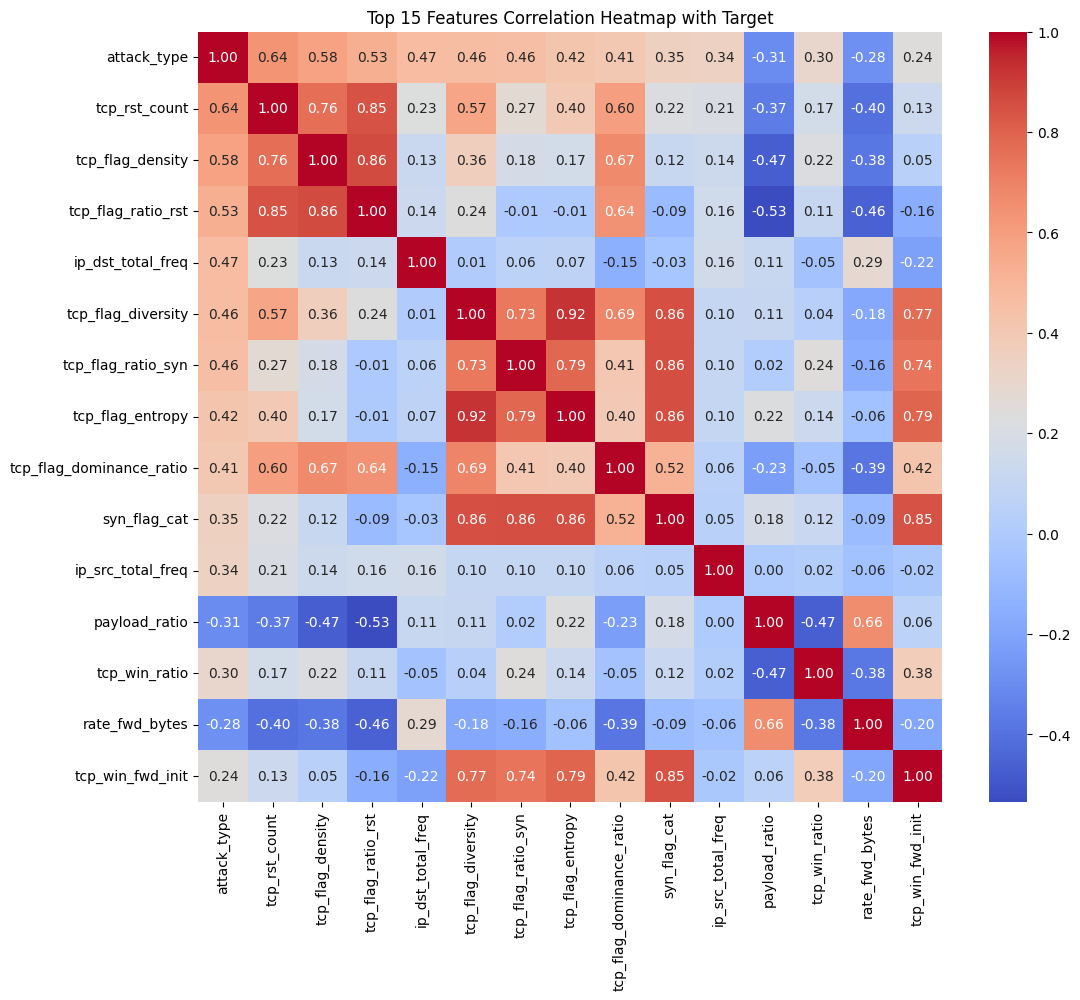

In [49]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns


corr = train[numeric_cols].corr()

top_features = corr['attack_type'].abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(12, 10))
sns.heatmap(train[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Top 15 Features Correlation Heatmap with Target')
plt.show()

# (4) 모델링 - 단일 LGBM

## X, Y 데이터 분리

In [ ]:
# Features
X = train.drop('attack_type',axis=1)

# Target
y = train['attack_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

## LightGBM Original

Fold 1
Fold 1 Macro F1 Score: 0.8398
Fold 2
Fold 2 Macro F1 Score: 0.8168
Fold 3
Fold 3 Macro F1 Score: 0.8157
Fold 4
Fold 4 Macro F1 Score: 0.7993
Fold 5
Fold 5 Macro F1 Score: 0.9166
Overall OOF Macro F1 Score: 0.8433


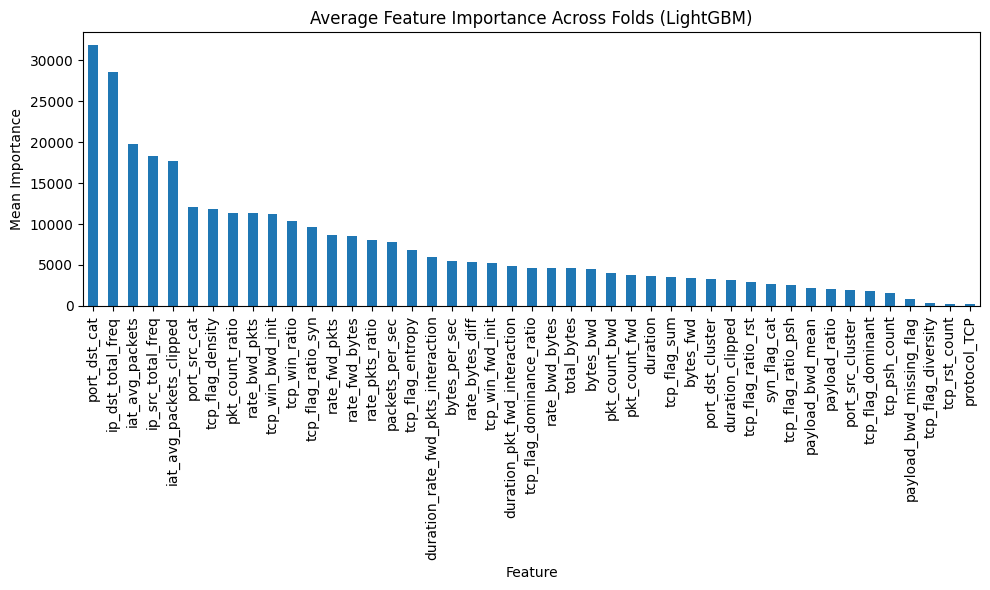

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, weights))

feature_importances = []

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=156)

oof_preds = np.zeros(len(train), dtype=int)
test_preds = np.zeros((n_splits, len(test)), dtype=int)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]

    model = LGBMClassifier(
        class_weight=class_weight_dict,
        n_estimators=1000,
        num_leaves=64,
        learning_rate=0.01,
        max_depth=6,
        random_state=156,
        objective='multiclass',
        device='gpu',
        verbose=-1,
        n_jobs=-1,
        num_class=len(np.unique(y))  # 다중분류 클래스 수 자동 계산
    )

    model.fit(X_train, y_train)

    # Feature Importance 저장
    fold_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    })
    feature_importances.append(fold_importance)

    # 검증 예측
    val_pred = model.predict(X_val)
    oof_preds[val_idx] = val_pred

    fold_f1 = f1_score(y_val, val_pred, average='macro')
    print(f"Fold {fold+1} Macro F1 Score: {fold_f1:.4f}")

    # 테스트 예측 저장
    test_preds[fold] = model.predict(test)

# 최종 테스트 예측: 다수결
final_test_preds, _ = mode(test_preds, axis=0)
final_test_preds = final_test_preds.flatten()

# 전체 OOF macro F1
total_f1 = f1_score(y, oof_preds, average='macro')
print(f"Overall OOF Macro F1 Score: {total_f1:.4f}")

# 전체 피처 중요도 시각화
fi_df = pd.concat(feature_importances)
mean_fi = fi_df.groupby('feature')['importance'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mean_fi.plot(kind='bar')
plt.title('Average Feature Importance Across Folds (LightGBM)')
plt.ylabel('Mean Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/sample_submission.csv')


submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': final_test_preds
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])

submission.to_csv('lgbm_original_add1.csv', index=False)

In [ ]:
from google.colab import files
files.download('lgbm_original_add1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

최종 모델을 돌리는 과정에서 GPU를 사용하는 과정을 거치며, 마지막 리더보드 점수를 올리는데 기여.

**최종 모델의 리더보드 점수:  0.92286**